In [7]:
#TASK A PART 1

import numpy as np
import matplotlib.pyplot as pl

#Simpson's rule with uniformly distributed points (the stepsize, h is constant) 

def simpsonsRule(xn,yn):
    h = xn[1] - xn[0] #First, finding the step size
    I = h / 3 * (yn[0] + yn[-1]) #Creating the integral and adding the last and first node
    
    for i in range(1,len(xn)-1):
        if i % 2 == 1:
            I += h / 3 * 4 * yn[i]
        else:
            I += h / 3 * 2 * yn[i] #Note that I multilpy with h/3 inside and that changes the end a tiny bit
    return I

#Testing to see if it works 

y1 = [2,4,6,8,10,12,14,16,18]
x1 = [2,4,6,8,10,12,14,16,18]

print(simpsonsRule(x1,y1))

            
    

159.99999999999997


In [17]:
#TASK A PART 2

#Adaptive simpsonsRule, note that here you will have to know (And replace in the funtion) y = f(x)

def adaptiveSimpsonsRule(domainLowerBound, domainUpperBound, tolerance):
    numberOfSubintervals = 1 #Start with one
    xn = np.linspace(domainLowerBound, domainUpperBound, numberOfSubintervals+1)
    yn = np.sin(xn) #RE-WRITE THE y = f(x) FUNCTION HERE
    
    I = simpsonsRule(xn,yn)
    
    error = tolerance * 10 #Set an artificially large error to enter the while loop:
    
    while error >= tolerance:
        numberOfSubintervals *= 2
        xn = np.linspace(domainLowerBound, domainUpperBound, numberOfSubintervals+1)
        yn = np.sin(xn) #RE-WRITE THE y = f(x) FUNCTION HERE
        I_ = simpsonsRule(xn,yn)
        error = np.abs(1 / 15 * (I-I_))
        I = I_
    
    return I

I = adaptiveSimpsonsRule(0, 4, 1.0e-5)

print(f"The integral of the function you put in, within the bounds is {I}")
        
    

    
    
    

The integral of the function you put in, within the bounds is 1.6536458679402308


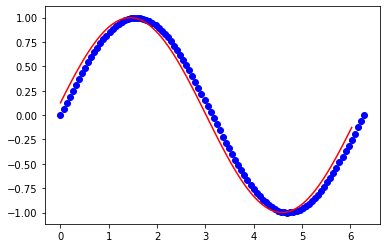

In [26]:
#TASK B 

#Computationally expensive way but does work for non equidistant nodes too:

def forwardsDifferentiation(x,y):
    
    dydx = []
    
    for i in range(len(x)-1):
        dydx.append((y[i+1] - y[i]) / (x[i+1] - x[i]))
        
    return dydx

def forwardsDifferentiationKTimes(x,y, k):
    dydx = forwardsDifferentiation(x,y)
    for i in range(1, k):
        dydx = forwardsDifferentiation(x[:-i], dydx)
    return dydx

xn = np.linspace(0,2*np.pi,100)
yn = np.sin(xn)
# oder of the derivative
k = 4

dyn = forwardsDifferentiationKTimes(xn, yn, k)
pl.scatter(xn,yn,c='Blue')
pl.plot(xn[:-k],dyn,c='Red')



        
    

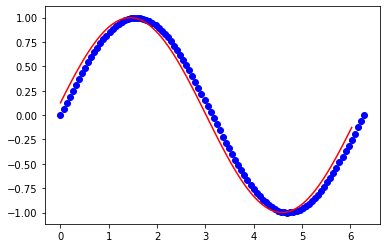

In [38]:
#TASK B but in a waay more efficient way:

#We will be using binomial coefficients to speed up the proscess and this way we will be able to jump to the right dervivative at first:
#For this we will need a few functions that help to find the coefficients

def factorial(n):
    if n==0:
        return 1
    else:
        return n*factorial(n-1)
    
def binomialCoefficients(n, k):
    nUnderK = factorial(n) / (factorial(k) * factorial(n - k))
    return nUnderK
    
#Now for the actual funtion:
    
def forwardsDifferentiationKTimesEfficient(xn, yn, k):
    dydx = []
    
    for n in range(len(xn)-k):
        y_ = 0
        for i in range(k+1):
            y_ += (-1)**i * binomialCoefficients(k, i) * yn[n+k-i] 
        dydx.append(y_ / (xn[1] - xn[0])**k)
    return dydx


        
xn = np.linspace(0,2*np.pi,100)
yn = np.sin(xn)
# oder of the derivative
k = 4

dyn = forwardsDifferentiationKTimesEfficient(xn, yn, k)
pl.scatter(xn,yn,c='Blue')
pl.plot(xn[:-k],dyn,c='Red')        
    
    

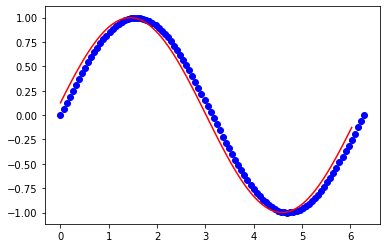

In [39]:
#TASK B with backwards differentiation 

#Computationally expensive way but does work for non equidistant nodes too:

def backwardsDifferentiation(xn,yn):
    
    dydx = []
    
    for i in range(1,len(xn)):
        dydx.append((yn[i] - yn[i-1]) / (xn[i] - xn[i-1]))
        
    return dydx

#BACKWARDS NUMERICAL DIFFERENTATION K TIMES (THIS USES THE FUNCTION ABOVE) NOTE: THIS IS VERY EXPENSIVE COMPUTATIONALLY BUT WILL WORK, THE BETTER VERSION BELOW WILL USE THE BINOMIAL SERIES TO QUICKEN THINGS IF THE STEP SIZE IS EQUAL EVERYWHERE

def backwardsDifferentiationKTimes(xn,yn, k):
    dydx = forwardsDifferentiation(xn,yn)
    for i in range(1, k):
        dydx = backwardsDifferentiation(xn[i:], dydx) #The x-s have to be split since we lose a node with each order of differentiation
    return dydx

xn = np.linspace(0,2*np.pi,100)
yn = np.sin(xn)
# oder of the derivative
k = 4

dyn = backwardsDifferentiationKTimes(xn, yn, k)
pl.scatter(xn,yn,c='Blue')
pl.plot(xn[:-k],dyn,c='Red')

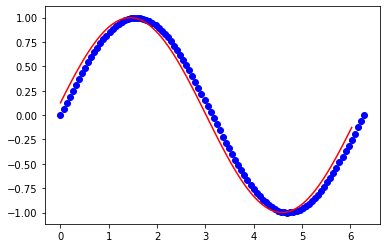

In [41]:
#TASK B with backwards differentiation in the efficient way:

def backwardsDifferentiationKTimesEfficient(xn, yn, k):
    dydx = []
    
    for n in range(k, len(xn)):
        y_ = 0
        for i in range(k+1):
            y_ += (-1)**i * binomialCoefficients(k, i) * yn[n-i] 
        dydx.append(y_ / (xn[1] - xn[0])**k)
    return dydx

xn = np.linspace(0,2*np.pi,100)
yn = np.sin(xn)
# oder of the derivative
k = 4

dyn = backwardsDifferentiationKTimesEfficient(xn, yn, k)
pl.scatter(xn,yn,c='Blue')
pl.plot(xn[:-k],dyn,c='Red')

The derivative without interpolating would be the red line


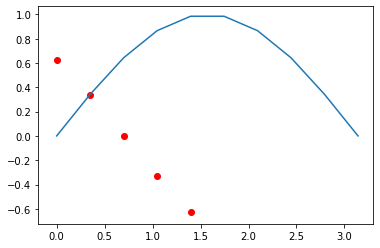

The derivative with interpolating would be the red line


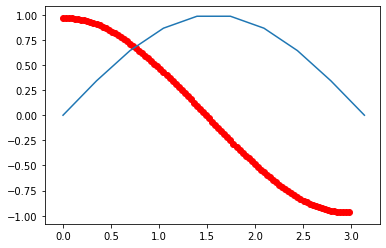

In [50]:
#TASK C - Smoothing derivatives with polynomial interpolation

#Making the known x and corresponding y values:
xn = np.linspace(0, np.pi, 10)
yn = np.sin(xn)

#Calculating and plotting the dervivative if we dont interpolate
dyn = forwardsDifferentiationKTimesEfficient(xn, yn, 5)

print("The derivative without interpolating would be the red line")
pl.plot(xn,yn)
pl.scatter(xn[0:-5], dyn, c='Red')
pl.show()

#To get a better answer intepolating between nodes

#LAGRANGIAN INTEROPOLATION (USES BOTH FUNCTIONS BELOW)
    
def Lagrangian(j, xp, xn):
    Lj = 1
    for k in range(len(xn)):
        if k != j:
            Lj = Lj * (xp - xn[k]) / (xn[j] - xn[k])
        else:
            pass
    return Lj

def LagrangianInterpolation(xn, yn, x):
    y = []
    for i in range(len(x)):
        a = 0
        xp = x[i]
        for j in range(len(yn)):
            a += yn[j] * Lagrangian(j,xp, xn)
        y.append(a)
    return y

#Defining the new domain

xn2 = np.linspace(0, np.pi, 100)

yn2 = LagrangianInterpolation(xn,yn, xn2)



#Calculating the new derivative

dyn2 = forwardsDifferentiationKTimesEfficient(xn2, yn2, 5)

#Plotting the result

print("The derivative with interpolating would be the red line")
pl.plot(xn,yn)
pl.scatter(xn2[:-5],dyn2, c = 'red') #Remember that we lose a node for each derivation we lose a node so the x list has to be sliced



